In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("credit_train.csv")
test_data = pd.read_csv("credit_test.csv")
combined_data = pd.concat([train_data, test_data], ignore_index=True)
combined_data.to_csv('combined_data.csv', index=False)

In [3]:
loan_data = pd.read_csv('combined_data.csv')
loan_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
loan_data.isnull().sum()

Loan ID                           867
Customer ID                       867
Loan Status                     10867
Current Loan Amount               867
Term                              867
Credit Score                    22002
Annual Income                   22002
Years in current job             5516
Home Ownership                    867
Purpose                           867
Monthly Debt                      867
Years of Credit History           867
Months since last delinquent    59314
Number of Open Accounts           867
Number of Credit Problems         867
Current Credit Balance            867
Maximum Open Credit               869
Bankruptcies                     1093
Tax Liens                         878
dtype: int64

In [5]:
loan_data.shape

(110867, 19)

In [6]:
loan_data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.100000e+05,88865.000000,8.886500e+04,110000.000000,110000.000000,51553.000000,110000.000000,110000.000000,1.100000e+05,1.099980e+05,109774.000000,109989.000000
mean,1.174621e+07,1076.594644,1.377449e+06,18468.526823,18.202485,34.907086,11.124491,0.168055,2.942822e+05,7.541012e+05,0.117614,0.029448
std,3.176716e+07,1475.581902,1.063920e+06,12195.564391,7.015575,21.965315,5.011093,0.484389,3.772773e+05,8.014002e+06,0.351290,0.261054
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795860e+05,705.000000,8.488440e+05,10211.930000,13.500000,16.000000,8.000000,0.000000,1.121950e+05,2.731575e+05,0.000000,0.000000
50%,3.120260e+05,724.000000,1.173459e+06,16202.440000,16.900000,32.000000,10.000000,0.000000,2.096650e+05,4.673900e+05,0.000000,0.000000
75%,5.239300e+05,741.000000,1.651670e+06,23997.522500,21.700000,51.000000,14.000000,0.000000,3.674838e+05,7.831945e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
loan_data = loan_data.dropna()

In [8]:
loan_data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [9]:
loan_data.groupby('Loan Status').sum()

C:\Users\khadeer\AppData\Local\Temp\ipykernel_10512\4206347437.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('Loan Status').sum()


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,,,,,,,,,,,,
Charged Off,2.475104e+09,17737815.0,1.009004e+10,1.464815e+08,139028.3,254464.0,87478.0,1432.0,1.924433e+09,4.373178e+09,839.0,344.0
Fully Paid,4.992811e+11,20713542.0,4.325365e+10,5.553625e+08,555376.2,1014927.0,331052.0,5344.0,7.677618e+09,1.985326e+10,3342.0,1061.0


In [10]:
loan_data.replace({'Loan Status':{'Fully Paid':1,'Charged Off':0}},inplace=True)

In [11]:
loan_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,1,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,1,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [12]:
loan_data.groupby('Term').sum()

C:\Users\khadeer\AppData\Local\Temp\ipykernel_10512\619924111.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('Term').sum()


,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Term,,,,,,,,,,,,,
Long Term,7704,1.028630e+11,12091871.0,1.690407e+10,2.303455e+08,204642.4,363651.0,126885.0,1743.0,3.288756e+09,7.323636e+09,1042.0,388.0
Short Term,21268,3.988932e+11,26359486.0,3.643962e+10,4.714985e+08,489762.1,905740.0,291645.0,5033.0,6.313296e+09,1.690281e+10,3139.0,1017.0


In [13]:
loan_data.replace({'Term':{'Long Term':1,'Short Term':0}},inplace=True)
loan_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,0,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,0,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,1,99999999.0,0,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,1,99999999.0,0,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [14]:
loan_data.groupby('Years in current job').sum()
loan_data.replace({'Years in current job':{'1 year':1,'10+ years':11,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'< 1 year':0.5}},inplace=True)

C:\Users\khadeer\AppData\Local\Temp\ipykernel_10512\2599333250.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('Years in current job').sum()


In [15]:
# loan_data.head()
# loan_data = loan_data.drop(columns=['Loan ID','Customer ID'],axis=1)
# loan_data.head()

In [16]:
loan_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,0,730.0,1184194.0,0.5,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,0,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,1,99999999.0,0,728.0,714628.0,3.0,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,1,99999999.0,0,740.0,776188.0,0.5,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [17]:
loan_data.groupby('Purpose').sum()
loan_data.groupby('Home Ownership').sum()


C:\Users\khadeer\AppData\Local\Temp\ipykernel_10512\348245449.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('Purpose').sum()
C:\Users\khadeer\AppData\Local\Temp\ipykernel_10512\348245449.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('Home Ownership').sum()


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Home Ownership,,,,,,,,,,,,,,,
HaveMortgage,76,1.407659e+09,8,87885.0,1.270992e+08,672.5,1.553084e+06,1683.2,2984.0,856.0,24.0,1.836185e+07,4.172554e+08,12.0,8.0
Home Mortgage,15356,2.670291e+11,6330,19434278.0,3.060525e+10,136173.0,4.006915e+08,376832.2,635547.0,225799.0,3401.0,5.861860e+09,1.517739e+10,2011.0,732.0
Own Home,2507,4.276302e+10,897,3509252.0,4.322701e+09,21100.5,5.771307e+07,62242.7,111840.0,36847.0,633.0,8.612356e+08,2.155601e+09,383.0,137.0
Rent,11033,1.905563e+11,3333,15419942.0,1.828865e+10,81140.5,2.418863e+08,253646.4,519020.0,155028.0,2718.0,2.860594e+09,6.476191e+09,1775.0,528.0


AttributeError: 'numpy.int64' object has no attribute 'startswith'

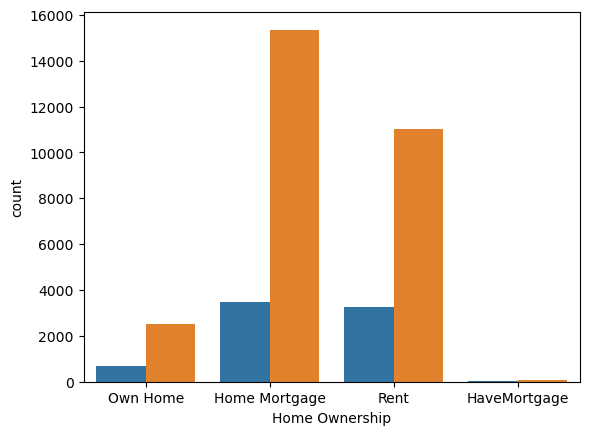

In [18]:
# plt.figure(figsize=(5,5))
sns.countplot(x='Home Ownership',hue='Loan Status',data=loan_data)


In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Purpose',hue='Loan Status',data=loan_data)
plt.xticks(rotation=90)

plt.show()

In [ ]:
loan_data.head()
x = loan_data.drop(['Purpose','Home Ownership'],axis=1)
y = loan_data['Loan Status']

In [ ]:
# x,y


In [ ]:
# split the data into train and test datas
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=2,stratify=y,random_state=2)

In [ ]:
x.shape , x_train.shape , x_test.shape

# training the model 
# by support vectpor machine model

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

In [ ]:
# model evaluate
# find the accuracy scrore
classifier_train__predict = classifier.predict(x_train)

In [ ]:
classifier_train_accuracy_sco = accuracy_score(classifier_train__predict,y_train)
print("The accuarcy score of training data of [rediction error is :- ",classifier_train__accuracy_sco)

In [ ]:
# training the model 
# by support vectpor machine model
# model evaluate
# find the accuracy scrore
classifier_test__predict = classifier.predict(x_test)
classifier_test_accuracy_sco = accuracy_score(classifier_test__predict,y_test)
print("The accuarcy score of testing data of [rediction error is :- ",classifier_test__accuracy_sco)